In [41]:
%matplotlib inline
import numpy as np
import glob
import math
import matplotlib.pyplot as plt

In [46]:
def latitudelongitude_to_nomecidade(path_arquivo):
    arquivo = open(path_arquivo)
    line = arquivo.readlines()[4:5]
    text = ''.join(line)
    lat_long = text.split()[1:5]
    lat_long = ''.join(lat_long)
    #Busca dados de Latitude e Longitude.
    arquivo = open(path_arquivo,encoding='UTF-8')
    line = arquivo.readlines()[35:36]
    text = ''.join(line)
    text = text.split(',')[0]
    city = text.split(':')[1][+1:]
    #Busca o nome da cidade mais próxima.
    return(lat_long,city)
    #Retorna os valores de Latitude e Longitude e o nome da cidade mais próxima.

In [47]:
#Testando a função que tem como objetivo trazer valores de Latitude e Longitude e o nome da cidade mais próxima.
latitudelongitude_to_nomecidade("./dados/29.74S-51.69W-TAVG-Trend.txt")

('29.74S,51.69W', 'Porto Alegre')

In [48]:
def temperatura_estimada_anual(path_arquivo):
    arquivo = open(path_arquivo,encoding='UTF-8')
    line = arquivo.readlines()[47]
    text = ''.join(line)
    temperatura_estimada_absoluta = text.split()[8]
    temperatura_estimada_abs = float(temperatura_estimada_absoluta)
    #Busca dados de temperatura absoluta estimada.
    data = np.loadtxt(path_arquivo, comments = "%")
    temperatura_anual_anomalia = np.nan_to_num(data[:,4])
    #Buscando dados de anomalia de temperatura anual.
    return temperatura_anual_anomalia + temperatura_estimada_abs

In [49]:
#Testando função que tem como objetivo que recebe o nome do "data" como argumento e retorna um array que representa a soma da
#"temperatura_anual_anomalia" com a "temperatura_estimada_absoluta" que são os dados de temperatura anual estimada.
temperatura_estimada_anual("./dados/29.74S-51.69W-TAVG-Trend.txt")

array([ 18.41 ,  18.41 ,  17.306, ...,  18.41 ,  18.41 ,  18.41 ])

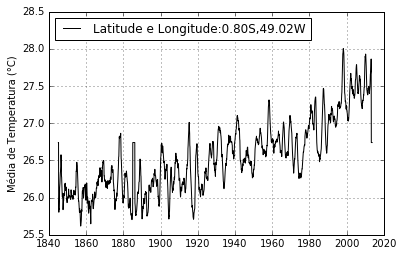

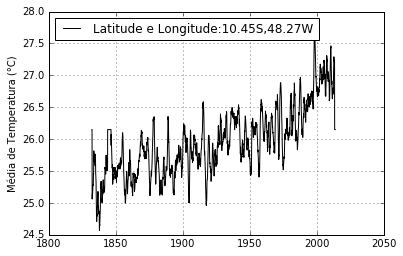

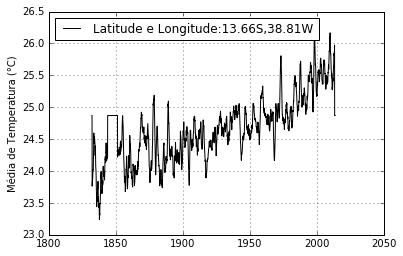

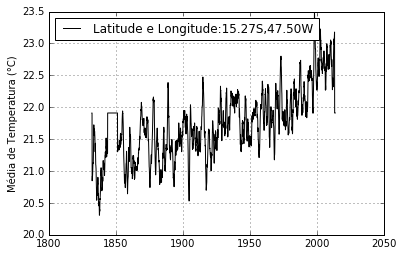

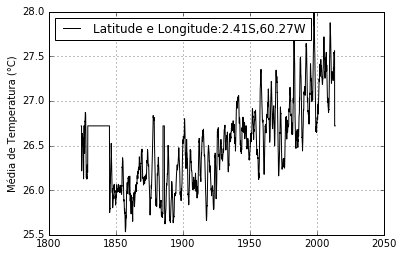

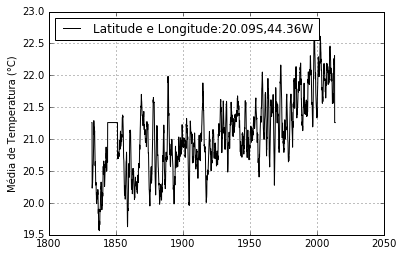

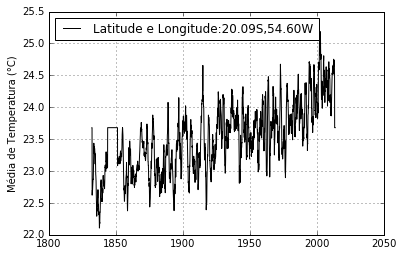

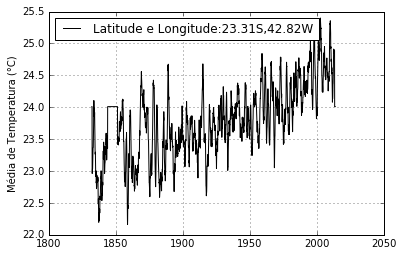

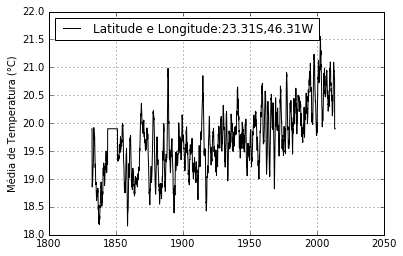

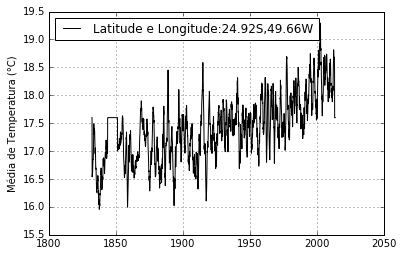

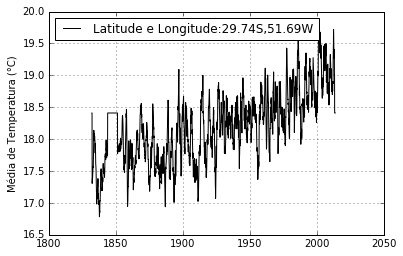

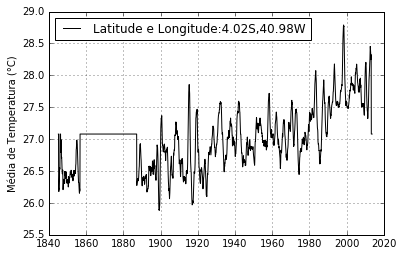

In [50]:
arquivos = glob.glob("dados/*.txt")
#Criando um loop de arquivos para que possamos trabalhar com todos os arquivos "data" de uma vez.
for arquivo in arquivos:
    #Excluindo do loop o dado que abrange todo o Brasil.
    if arquivo !="dados\\brazil-TAVG-Trend.txt":
        temperatura_anual_anomalia = temperatura_estimada_anual(arquivo)
        latitude_longitude = latitudelongitude_to_nomecidade(arquivo)[0]
        city_name = latitudelongitude_to_nomecidade(arquivo)[1]
        #Definindo os valores das variaveis.
        matriz = np.loadtxt(arquivo, comments = "%")
        #Trazendo os dados para o código.
        anos = matriz[:,0]
        meses = matriz [:,1]
        anos_decimais = anos + (meses - 1)/12
        #Transformando anos corridos em anos decimais.
        plt.figure()
        plt.ylabel("Média de Temperatura (°C)")
        plt.plot(anos_decimais,temperatura_anual_anomalia, color="black", label = "Latitude e Longitude:" + latitude_longitude)
        plt.legend(loc = "upper left")
        plt.grid(True)
        #Defininfo como serão os gráficos a serem plotados pelo loop.
        arquivo_png = city_name.replace(' ','_') + ".png"
        plt.savefig(arquivo_png)